<a href="https://colab.research.google.com/github/ekaratnida/Applied-machine-learning/blob/master/Example1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# Install necessary libraries if they are not already installed
# !pip install pandas numpy matplotlib

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# 1. Data Collection (Example: Simulated Pharmacy Data)
# Simulate pharmacy prescription data
def collect_data():
    data = {
        'Prescription_ID': range(1, 11),
        'Drug_Name': ['Drug_A', 'Drug_B', 'Drug_C', 'Drug_A', 'Drug_B', 'Drug_C', 'Drug_A', 'Drug_B', 'Drug_C', 'Drug_A'],
        'Patient_Age': [34, 67, 50, 45, 72, 30, 65, 60, 40, 38],
        'Dosage_mg': [20, 50, 10, 20, 50, 10, 20, 50, 10, 20],
        'Duration_days': [30, 15, 60, 45, 10, 30, 20, 15, 60, 45],
        'Pharmacy_Name': ['Pharma_X', 'Pharma_Y', 'Pharma_Z', 'Pharma_X', 'Pharma_Y', 'Pharma_Z', 'Pharma_X', 'Pharma_Y', 'Pharma_Z', 'Pharma_X']
    }
    df = pd.DataFrame(data)
    return df

pharmacy_data = collect_data()
print("Raw Pharmacy Data:")
print(pharmacy_data.head())

Raw Pharmacy Data:
   Prescription_ID Drug_Name  Patient_Age  Dosage_mg  Duration_days  \
0                1    Drug_A           34         20             30   
1                2    Drug_B           67         50             15   
2                3    Drug_C           50         10             60   
3                4    Drug_A           45         20             45   
4                5    Drug_B           72         50             10   

  Pharmacy_Name  
0      Pharma_X  
1      Pharma_Y  
2      Pharma_Z  
3      Pharma_X  
4      Pharma_Y  


In [17]:
# 2. Data Cleaning (Example: Handle Missing Values, Duplicates)
def clean_data(df):
    # Add some NaN values for example
    df.loc[0, 'Patient_Age'] = np.nan
    df.loc[3, 'Duration_days'] = np.nan
    print("\nData with missing values:")
    print(df)

    # Fill missing values (e.g., mean for Age, forward fill for Duration)
    df['Patient_Age'].fillna(df['Patient_Age'].mean(), inplace=True)
    df['Duration_days'].fillna(method='ffill', inplace=True)

    # Remove any duplicate rows if they exist
    df.drop_duplicates(inplace=True)
    return df

cleaned_data = clean_data(pharmacy_data)
print("\nCleaned Data:")
print(cleaned_data.head())



Data with missing values:
   Prescription_ID Drug_Name  Patient_Age  Dosage_mg  Duration_days  \
0                1    Drug_A          NaN         20           30.0   
1                2    Drug_B         67.0         50           15.0   
2                3    Drug_C         50.0         10           60.0   
3                4    Drug_A         45.0         20            NaN   
4                5    Drug_B         72.0         50           10.0   
5                6    Drug_C         30.0         10           30.0   
6                7    Drug_A         65.0         20           20.0   
7                8    Drug_B         60.0         50           15.0   
8                9    Drug_C         40.0         10           60.0   
9               10    Drug_A         38.0         20           45.0   

  Pharmacy_Name  
0      Pharma_X  
1      Pharma_Y  
2      Pharma_Z  
3      Pharma_X  
4      Pharma_Y  
5      Pharma_Z  
6      Pharma_X  
7      Pharma_Y  
8      Pharma_Z  
9      Phar

<ipython-input-17-0e12bf01b5c5>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Patient_Age'].fillna(df['Patient_Age'].mean(), inplace=True)
<ipython-input-17-0e12bf01b5c5>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [18]:
# 3. Data Structuring (Example: Reformat Data for Analysis)
def structure_data(df):
    # Pivot the data to see total dosage per pharmacy and drug
    structured_df = df.pivot_table(values='Dosage_mg', index='Pharmacy_Name', columns='Drug_Name', aggfunc='sum', fill_value=0)
    return structured_df

structured_data = structure_data(cleaned_data)
print("\nStructured Data (Pivot Table):")
print(structured_data.head())



Structured Data (Pivot Table):
Drug_Name      Drug_A  Drug_B  Drug_C
Pharmacy_Name                        
Pharma_X           80       0       0
Pharma_Y            0     150       0
Pharma_Z            0       0      30


In [19]:

# 4. Data Enrichment (Example: Add a Derived Column)
def enrich_data(df):
    # Add a column calculating total dosage over the duration of the prescription
    df['Total_Dosage'] = df['Dosage_mg'] * df['Duration_days']
    return df

enriched_data = enrich_data(cleaned_data)
print("\nEnriched Data with Total Dosage:")
print(enriched_data.head())



Enriched Data with Total Dosage:
   Prescription_ID Drug_Name  Patient_Age  Dosage_mg  Duration_days  \
0                1    Drug_A    51.888889         20           30.0   
1                2    Drug_B    67.000000         50           15.0   
2                3    Drug_C    50.000000         10           60.0   
3                4    Drug_A    45.000000         20           60.0   
4                5    Drug_B    72.000000         50           10.0   

  Pharmacy_Name  Total_Dosage  
0      Pharma_X         600.0  
1      Pharma_Y         750.0  
2      Pharma_Z         600.0  
3      Pharma_X        1200.0  
4      Pharma_Y         500.0  


In [20]:

# 5. Data Transformation (Example: Normalize and Aggregate Data)
def transform_data(df):
    # Normalize the Dosage column (scaling between 0 and 1)
    df['Dosage_mg_normalized'] = (df['Dosage_mg'] - df['Dosage_mg'].min()) / (df['Dosage_mg'].max() - df['Dosage_mg'].min())

    # Aggregate data by Pharmacy_Name to see total dosage for each pharmacy
    aggregated_data = df.groupby('Pharmacy_Name').agg({'Total_Dosage': 'sum'}).reset_index()

    return df, aggregated_data

transformed_data, aggregated_data = transform_data(enriched_data)
print("\nTransformed Data with Normalized Dosage:")
print(transformed_data.head())
print("\nAggregated Data by Pharmacy:")
print(aggregated_data.head())


Transformed Data with Normalized Dosage:
   Prescription_ID Drug_Name  Patient_Age  Dosage_mg  Duration_days  \
0                1    Drug_A    51.888889         20           30.0   
1                2    Drug_B    67.000000         50           15.0   
2                3    Drug_C    50.000000         10           60.0   
3                4    Drug_A    45.000000         20           60.0   
4                5    Drug_B    72.000000         50           10.0   

  Pharmacy_Name  Total_Dosage  Dosage_mg_normalized  
0      Pharma_X         600.0                  0.25  
1      Pharma_Y         750.0                  1.00  
2      Pharma_Z         600.0                  0.00  
3      Pharma_X        1200.0                  0.25  
4      Pharma_Y         500.0                  1.00  

Aggregated Data by Pharmacy:
  Pharmacy_Name  Total_Dosage
0      Pharma_X        3100.0
1      Pharma_Y        2000.0
2      Pharma_Z        1500.0



Data is consistent.


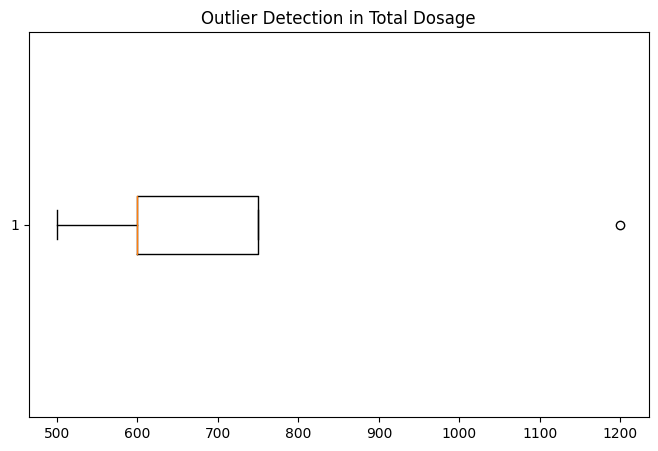

In [21]:


# 6. Validation (Example: Check for Consistency and Outliers)
def validate_data(df):
    # Check for any negative values in Dosage or Duration (inconsistent data)
    if (df['Dosage_mg'] < 0).any() or (df['Duration_days'] < 0).any():
        print("\nWarning: Inconsistent data detected! Negative values found.")
    else:
        print("\nData is consistent.")

    # Visualize data to check for outliers in Total Dosage
    plt.figure(figsize=(8,5))
    plt.boxplot(df['Total_Dosage'], vert=False)
    plt.title("Outlier Detection in Total Dosage")
    plt.show()

validate_data(enriched_data.head())

